Importacion de datos


In [95]:
#Instalación de librerias necesarias
import pandas as pd
import pycaret
import pycaret.classification as pycc
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
#Carga de los datos con ayuda de la libreria pandas
datos=pd.read_csv("Modelación.csv")
#Se enseñan los primeros 5 registros del dataframe
datos.head()

,Temperatura_prom,Temperatura_max,Temperatura_min,P_rocio_prom,P_rocio_min,HR_prom,HR_max,HR_min,Radiacion,Viento_prom,...,HR-2,Viento-1,Viento-2,Precipitación-1,Precipitación-2,Radiacion-1,Radiacion-2,Aplicacion_contacto,Aplicación_sistémica,Incidencia_num
0,13.89,20.24,8.12,10,6,78.24,100,46.87,144,1.1,...,83.02,0.825,0.826,2.775,2.313,137.08,136.86,1,0,11.0
1,13.89,20.24,8.12,10,6,78.24,100,46.87,144,1.1,...,83.02,0.825,0.826,2.775,2.313,137.08,136.86,1,0,12.5
2,13.89,20.24,8.12,10,6,78.24,100,46.87,144,1.1,...,83.02,0.825,0.826,2.775,2.313,137.08,136.86,1,0,8.0
3,13.89,20.24,8.12,10,6,78.24,100,46.87,144,1.1,...,83.02,0.825,0.826,2.775,2.313,137.08,136.86,1,0,8.5
4,13.89,20.24,8.12,10,6,78.24,100,46.87,144,1.1,...,83.02,0.825,0.826,2.775,2.313,137.08,136.86,1,0,59.5


In [63]:
#Se crea una nueva variable clasificadora donde:
# 0% Incidencia es igual a Incidencia Nivel 0
# 1% <= x% <= 20% Incidencia es igual a Incidencia Nivel 1
# 21% <= x% Incidencia es igual a Incidencia Nivel 2
lis=[]
for i in datos.Incidencia_num:
    if i==0:
        lis.append(0)
    elif i<=20:
        lis.append(1)
    else:
        lis.append(2)
# Nueva varible se añade al dataframe
datos['Incidencia']=lis

# Se elimina antigua variable de incidencia ya que no hace parte de las variables explicativas del modelo
datos=datos.drop('Incidencia_num',axis=1)

#Se imprimen los nombres de las columnas evaluando si las transformaciones se hicieron correctamente
datos.columns

Index(['Temperatura_prom', 'Temperatura_max', 'Temperatura_min',
       'P_rocio_prom', 'P_rocio_min', 'HR_prom', 'HR_max', 'HR_min',
       'Radiacion', 'Viento_prom', 'Viento_max', 'Precipitacion', 'Estrato',
       'Flores_abiertas', 'Fenologia', 'Temp-1', 'Temp-2', 'P_rocio-1',
       'P_rocio-2', 'HR-1', 'HR-2', 'Viento-1', 'Viento-2', 'Precipitación-1',
       'Precipitación-2', 'Radiacion-1', 'Radiacion-2', 'Aplicacion_contacto',
       'Aplicación_sistémica', 'Incidencia'],
      dtype='object')

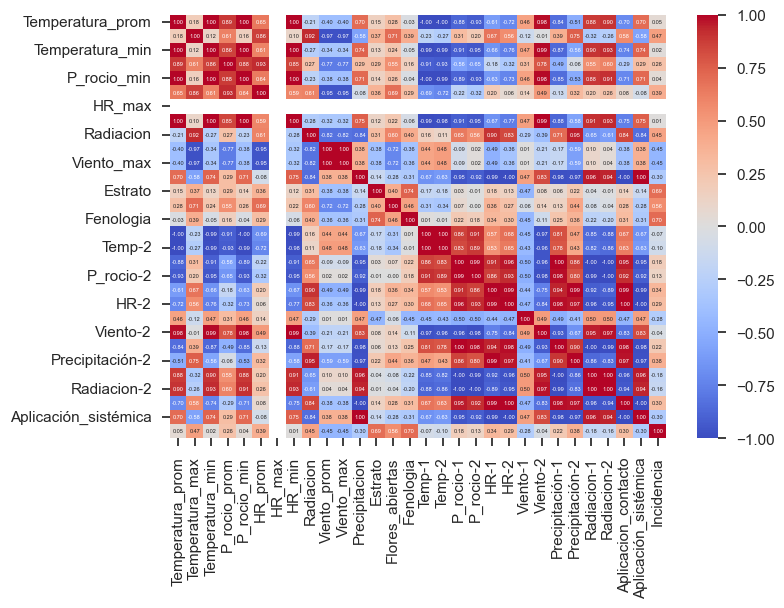

In [64]:

correlation_matrix = datos.corr()

# Imprime la matriz de correlación
annot_font_size = 4


# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": annot_font_size})
plt.show()


In [65]:
#Se imprimen las dimensiones del dataframe para luego dividir este mismo en un set de entrenamiento y un set de prueba
datos.shape

(96, 30)

In [66]:
#Se establece el set de entrenamiento y el set de prueba con ayuda de la funcion set up.
#Esta funcion recibe como argumentos nuestro dataframe, la variable etiqueta "Incidencia" y el tamaño del test de entrenamiento (80%)
auto =setup(data=datos, target="Incidencia", session_id=123,  train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Incidencia
2,Target type,Multiclass
3,Original data shape,"(96, 30)"
4,Transformed data shape,"(96, 30)"
5,Transformed train set shape,"(76, 30)"
6,Transformed test set shape,"(20, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [68]:
#La función compare_models se utiliza para comparar varios modelos de aprendizaje automático y seleccionar el mejor modelo según ciertos criterios de rendimiento.
# fold se refiere al número de "folds" (pliegues) en la validación cruzada. En este caso, se está utilizando validación cruzada con 3 pliegues. 
best_model = compare_models(fold=3)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:02:50
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6979,0.8618,0.6979,0.7306,0.6934,0.5404,0.5553,0.0800
lda,Linear Discriminant Analysis,0.6974,0.8707,0.6974,0.7401,0.6805,0.5389,0.5590,0.0200
ridge,Ridge Classifier,0.6846,0.0000,0.6846,0.7244,0.6713,0.5201,0.5419,0.0167
lightgbm,Light Gradient Boosting Machine,0.6846,0.8498,0.6846,0.7188,0.6808,0.5197,0.5338,0.0533
knn,K Neighbors Classifier,0.6574,0.8206,0.6574,0.6914,0.6351,0.4679,0.4896,0.0600
ada,Ada Boost Classifier,0.6472,0.8304,0.6472,0.7277,0.6486,0.4738,0.4927,0.0467
dt,Decision Tree Classifier,0.6441,0.7217,0.6441,0.6514,0.6328,0.4563,0.4675,0.0167
gbc,Gradient Boosting Classifier,0.6308,0.8043,0.6308,0.6420,0.6159,0.4372,0.4544,0.1133
nb,Naive Bayes,0.6200,0.8367,0.6200,0.6893,0.6066,0.4225,0.4511,0.0167
rf,Random Forest Classifier,0.6179,0.8081,0.6179,0.6153,0.6092,0.4184,0.4247,0.0800


                                                        Modelos Individuales


In [69]:
#Se importan los tres modelos de la libreria sklearn

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Ridge Classifier
from sklearn.linear_model import RidgeClassifier

# Se importa la función train_test_split de la biblioteca scikit-learn, que se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

#Se importan algunas métricas de evaluación de modelos de clasificación desde la biblioteca scikit-learn (sklearn).

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [70]:
# Se crea una lista llamada columnas_x que contiene todos los nombres de las columnas en el DataFrame datos, excepto la columna llamada 'Incidencia'.
columnas_x=[col for col in datos if col != 'Incidencia']   
# Se utiliza la lista de columnas creada anteriormente (columnas_x) para seleccionar solo las columnas que contienen las características (variables independientes) del conjunto de datos. Se utiliza el atributo .values para obtener los valores como un array de NumPy.
x=datos[columnas_x].values
# Se selecciona la columna 'Incidencia' como la variable objetivo (y). Se utiliza el atributo .values para obtener los valores como un array de NumPy.
y=datos['Incidencia'].values

In [71]:
# División de datos en conjuntos de entrenamiento y prueba.
# x son las características del conjunto de datos.
# y es la variable objetivo.
# test_size=0.2 indica que el 20% de los datos se utilizarán como conjunto de prueba, y el 80% se utilizará como conjunto de entrenamiento.
# random_state=42 establece una semilla para la reproducibilidad, asegurando que la división sea la misma en cada ejecución del código.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

La función devuelve cuatro conjuntos de datos: X_train (características de entrenamiento), X_test (características de prueba), y_train (etiquetas de entrenamiento), y y_test (etiquetas de prueba).

Logistic Regression

In [72]:
# En esta línea, se crea una instancia del modelo Logistic Regression especificando la semilla.
logistic_regression_model = LogisticRegression(random_state=42)

# Aquí, el modelo se entrena con el conjunto de entrenamiento. X_train son las características de entrenamiento, y y_train son las etiquetas de entrenamiento.
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
#Se realizan las predicciones del modelo
predictions = logistic_regression_model.predict(X_test)
#Se imprimen predicciones
predictions

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2],
      dtype=int64)

In [74]:
# Se utiliza la función confusion_matrix de scikit-learn para calcular la matriz de confusión. Esta matriz muestra cuántas de las muestras fueron clasificadas correctamente y cuántas fueron clasificadas incorrectamente
matrix_1 = confusion_matrix(y_test, predictions)
print(matrix_1)
# Se utiliza la función accuracy_score de scikit-learn para calcular la precisión del modelo. 
# La precisión se define como la proporción de predicciones correctas sobre el total de predicciones. 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

[[8 1 0]
 [1 5 0]
 [0 2 3]]
Accuracy: 0.8


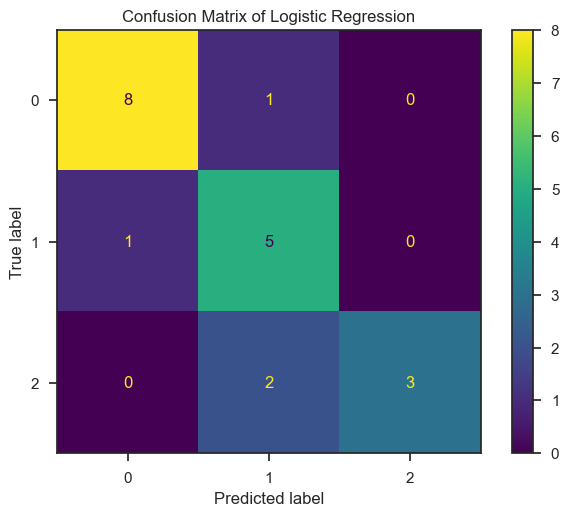

In [75]:
# Se crea una instancia de la clase ConfusionMatrixDisplay utilizando la matriz de confusión (matrix_1) que se calculó anteriormente.
cm_display = ConfusionMatrixDisplay(matrix_1)

# Se crea una visualización de la matriz de confusión 
cm_display.plot()
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [76]:
logistic_regression_model.coef_[0]

array([-1.73765614e-06,  1.01052583e-02,  6.71525193e-03,  3.11159088e-02,
        6.43334661e-02,  1.18253011e-01, -5.97285546e-02,  1.43725397e-01,
        3.87245316e-02, -3.54695498e-03, -1.68388466e-02,  1.31848622e-02,
       -1.70458879e+00, -1.48040801e-01, -9.56228438e-01, -1.94826550e-02,
       -1.98841587e-02, -2.06709967e-02, -2.28057131e-02, -6.38029933e-02,
       -7.29164854e-02,  5.36498721e-02,  1.21807467e-03, -1.60059600e-02,
       -2.87583277e-03, -1.08619523e-02, -7.07204132e-03, -8.78664095e-03,
        8.18935540e-03])

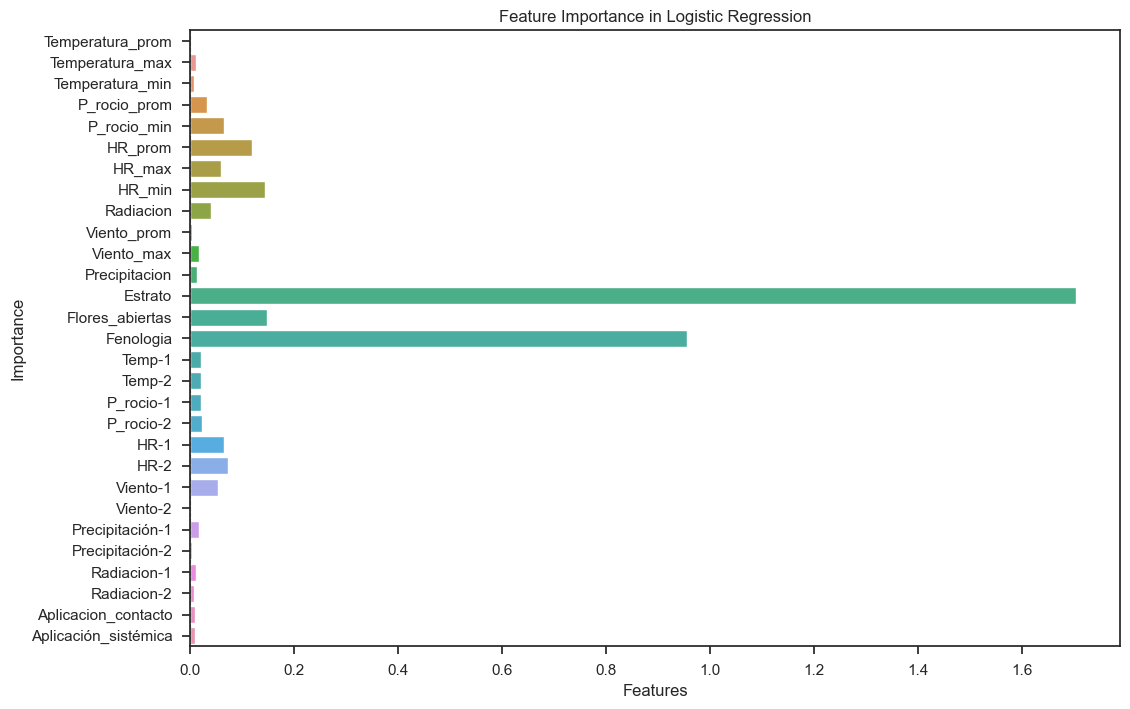

In [77]:
import numpy as np
coeficientes = abs(logistic_regression_model.coef_[0])
nombres_caracteristicas = columnas_x
plt.figure(figsize=(12, 8))
sns.barplot(x=coeficientes, y=nombres_caracteristicas)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Logistic Regression')
plt.show() 

Linear Discriminant Analysis

In [78]:
# En esta línea, se crea una instancia del modelo Linear Discriminant Analysis sin especificar ningún hiperparámetro.
lda_model = LinearDiscriminantAnalysis()
# Aquí, el modelo se entrena con el conjunto de entrenamiento. X_train son las características de entrenamiento, y y_train son las etiquetas de entrenamiento.
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [79]:
#Se realizan las predicciones del modelo
predictions = lda_model.predict(X_test)
#Se imprimen predicciones
predictions

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2],
      dtype=int64)

In [80]:
# Se utiliza la función confusion_matrix de scikit-learn para calcular la matriz de confusión. Esta matriz muestra cuántas de las muestras fueron clasificadas correctamente y cuántas fueron clasificadas incorrectamente
matrix_2 = confusion_matrix(y_test, predictions)
print(matrix_2)
# Se utiliza la función accuracy_score de scikit-learn para calcular la precisión del modelo. 
# La precisión se define como la proporción de predicciones correctas sobre el total de predicciones. 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


[[8 1 0]
 [0 5 1]
 [0 3 2]]
Accuracy: 0.75


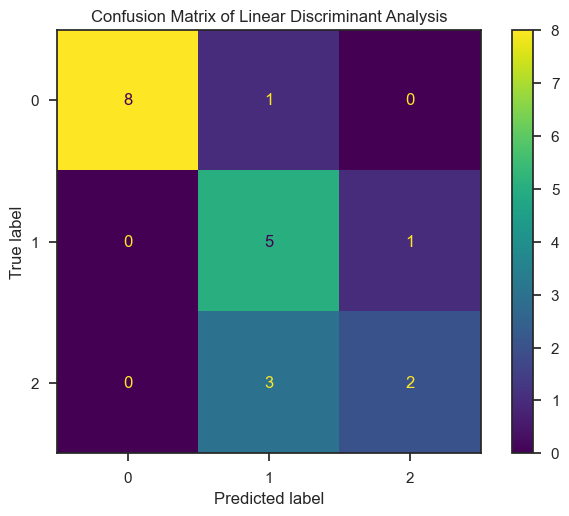

In [81]:
# Se crea una instancia de la clase ConfusionMatrixDisplay utilizando la matriz de confusión (matrix_1) que se calculó anteriormente.
cm_display = ConfusionMatrixDisplay(matrix_2)

# Se crea una visualización de la matriz de confusión 
cm_display.plot()
plt.title('Confusion Matrix of Linear Discriminant Analysis')
plt.show()

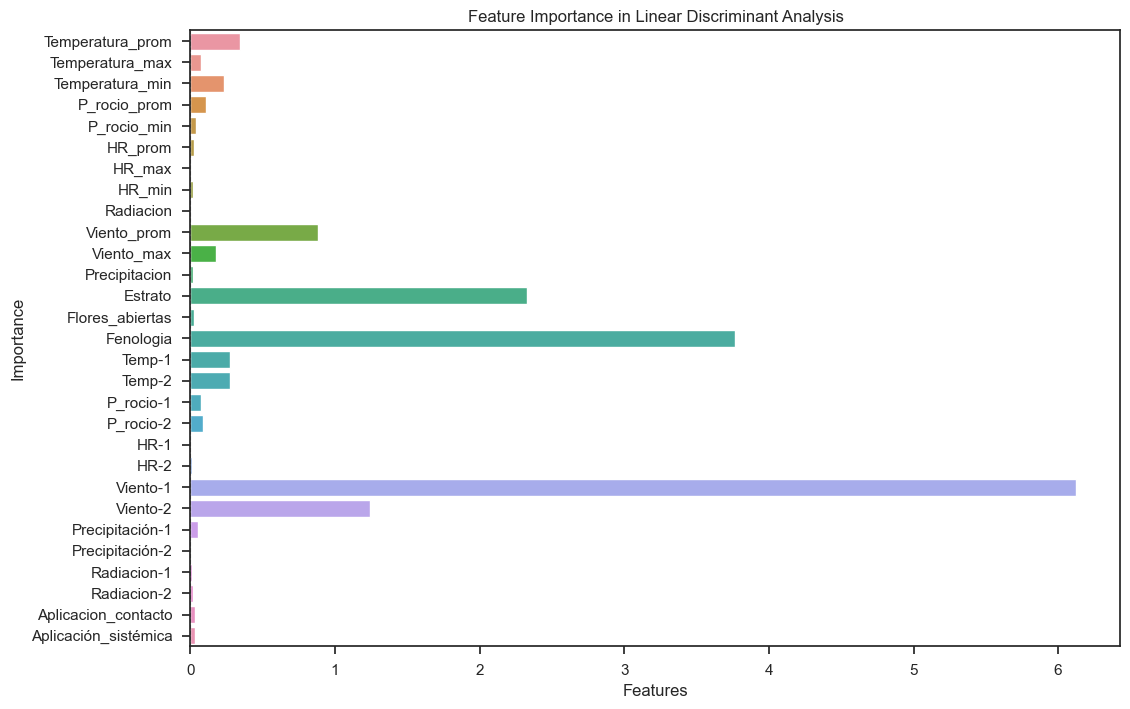

In [82]:
import numpy as np
coeficientes = abs(lda_model.coef_[0])
nombres_caracteristicas = columnas_x
plt.figure(figsize=(12, 8))
sns.barplot(x=coeficientes, y=nombres_caracteristicas)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Linear Discriminant Analysis')
plt.show() 

Ridge Classifier

In [83]:
# En esta línea, se crea una instancia del modelo Ridge Classifier sin especificar ningún hiperparámetro.
modelo_ridge = RidgeClassifier()

# Aquí, el modelo se entrena con el conjunto de entrenamiento. X_train son las características de entrenamiento, y y_train son las etiquetas de entrenamiento.
modelo_ridge.fit(X_train, y_train)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=None, solver='auto',
                tol=0.0001)

In [84]:
#Se realizan las predicciones del modelo
predictions = modelo_ridge.predict(X_test)
#Se imprimen predicciones
predictions

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2],
      dtype=int64)

In [85]:
# Se utiliza la función confusion_matrix de scikit-learn para calcular la matriz de confusión. Esta matriz muestra cuántas de las muestras fueron clasificadas correctamente y cuántas fueron clasificadas incorrectamente
matrix_3 = confusion_matrix(y_test, predictions)
print(matrix_3)
# Se utiliza la función accuracy_score de scikit-learn para calcular la precisión del modelo. 
# La precisión se define como la proporción de predicciones correctas sobre el total de predicciones. 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


[[8 1 0]
 [0 5 1]
 [0 3 2]]
Accuracy: 0.75


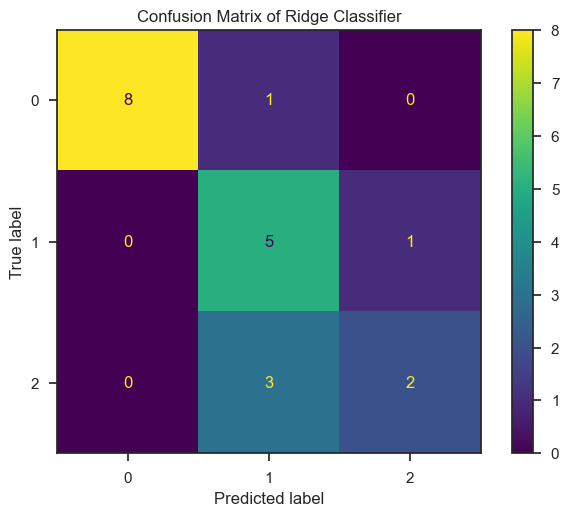

In [86]:
# Se crea una instancia de la clase ConfusionMatrixDisplay utilizando la matriz de confusión (matrix_1) que se calculó anteriormente.
cm_display = ConfusionMatrixDisplay(matrix_3)

# Se crea una visualización de la matriz de confusión 
cm_display.plot()
plt.title('Confusion Matrix of Ridge Classifier')
plt.show()

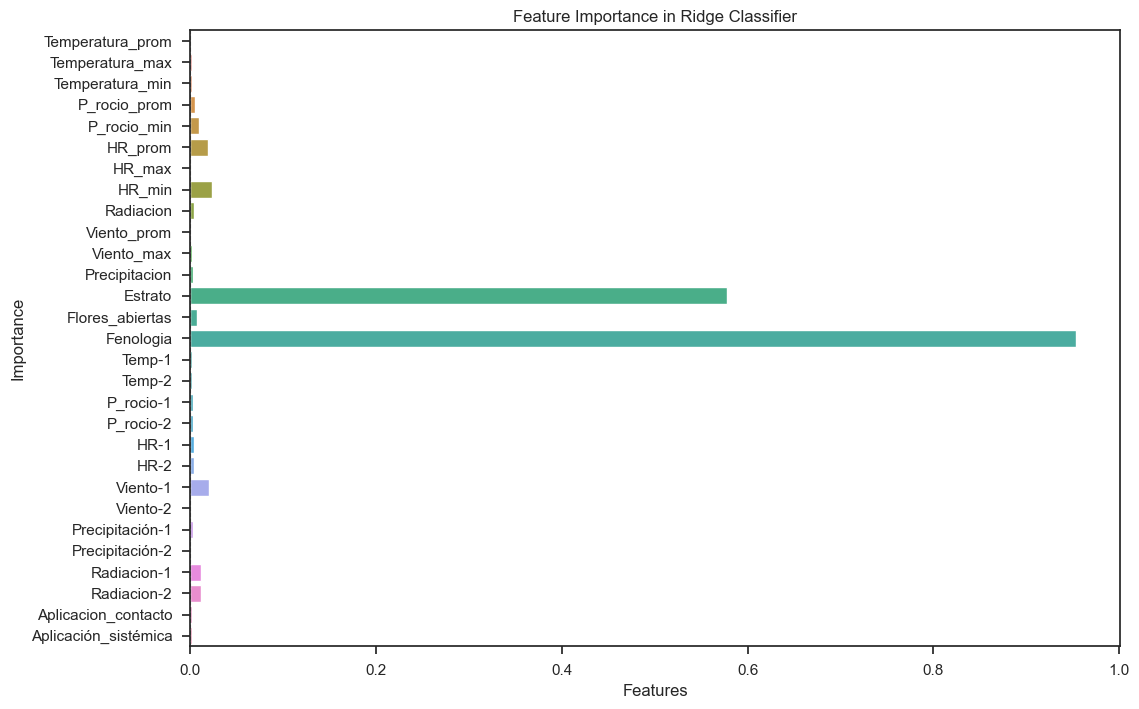

In [88]:
import numpy as np
coeficientes = abs(modelo_ridge.coef_[0])
nombres_caracteristicas = columnas_x
plt.figure(figsize=(12, 8))
sns.barplot(x=coeficientes, y=nombres_caracteristicas)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Ridge Classifier')
plt.show() 

In [167]:
df = pd.read_csv("C:/Users/jorge/OneDrive/Escritorio/Manejos/Enfermedades/Ejercicio modelado/Series de tiempo.csv")
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.head()


,Incidencia,HR_min,PDR_min,Viento_prom,Flores_abiertas
Fecha,,,,,
2023-08-20,NaN,10.0,62.24,0.8,NaN
2023-08-21,NaN,10.4,57.53,0.7,NaN
2023-08-22,NaN,8.7,54.14,1.0,NaN
2023-08-23,NaN,2.0,30.66,1.0,NaN
2023-08-24,NaN,7.3,51.16,0.7,NaN


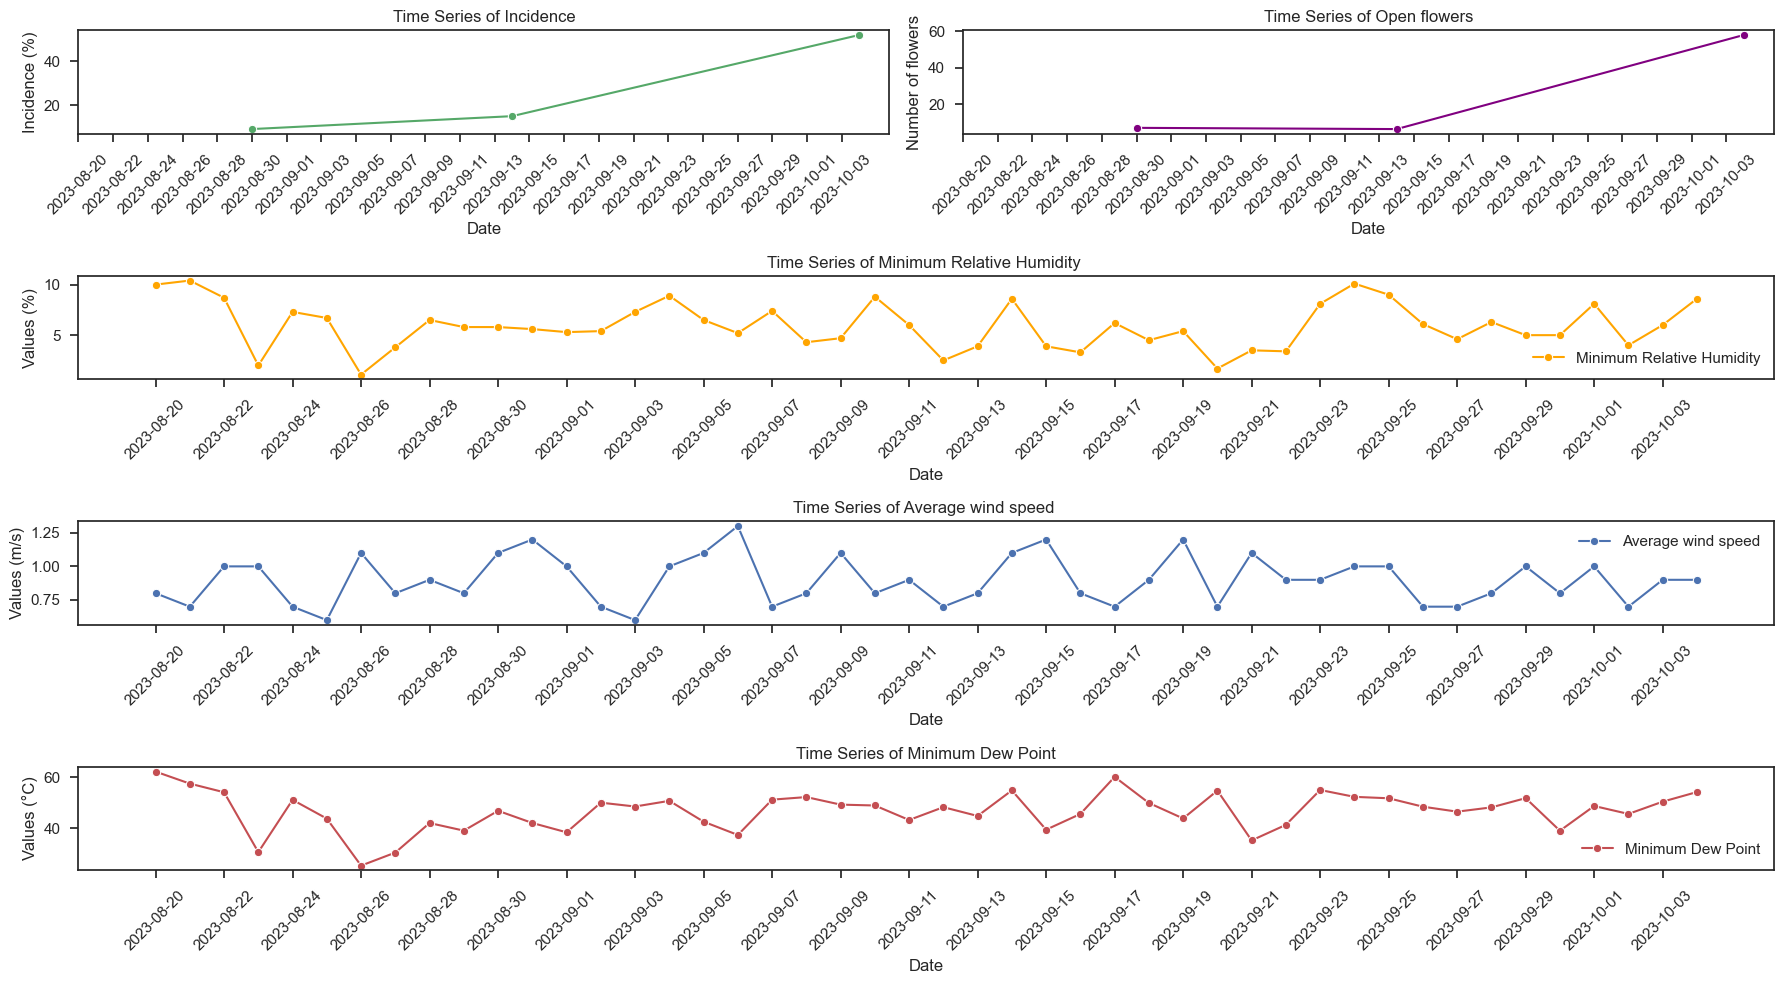

In [172]:
plt.figure(figsize=(18, 10))

# Primer gráfico:
plt.subplot(4, 1, 2)
sns.lineplot(data=df, x=df.index, y='HR_min', marker='o', color='orange', label='Minimum Relative Humidity')

plt.title('Time Series of Minimum Relative Humidity ')
plt.xlabel('Date')
plt.ylabel('Values (%)')

plt.xticks(rotation=45)
plt.xticks(df.index[::2], df.index.strftime('%Y-%m-%d')[::2])


plt.legend()

# Segundo grafico: 
plt.subplot(4, 1, 3)
sns.lineplot(data=df, x=df.index, y='Viento_prom', marker='o', color='b', label='Average wind speed')

plt.title('Time Series of Average wind speed ')
plt.xlabel('Date')
plt.ylabel('Values (m/s)')


plt.xticks(rotation=45)
plt.xticks(df.index[::2], df.index.strftime('%Y-%m-%d')[::2])


plt.legend()
# Tercer grafico
plt.subplot(4, 1, 4)
sns.lineplot(data=df, x=df.index, y='PDR_min', marker='o', color='r', label='Minimum Dew Point')

plt.title('Time Series of Minimum Dew Point')
plt.xlabel('Date')
plt.ylabel('Values (°C)')


plt.xticks(rotation=45)
plt.xticks(df.index[::2], df.index.strftime('%Y-%m-%d')[::2])

plt.legend()

# Cuarto gráfico
plt.subplot(4, 2, 1)
sns.lineplot(data=df, x=df.index, y='Incidencia', marker='o', color='g')
plt.title('Time Series of Incidence')
plt.xlabel('Date')
plt.ylabel('Incidence (%)')
plt.xticks(rotation=45)
plt.xticks(df.index[::2], df.index.strftime('%Y-%m-%d')[::2])

# Quinto gráfico
plt.subplot(4, 2, 2)  
sns.lineplot(data=df, x=df.index, y='Flores_abiertas', marker='o', color='purple')
plt.title('Time Series of Open flowers')
plt.xlabel('Date')
plt.ylabel('Number of flowers')
plt.xticks(rotation=45)
plt.xticks(df.index[::2], df.index.strftime('%Y-%m-%d')[::2])

plt.tight_layout()

plt.tight_layout()
plt.show()